In [297]:
%pip install gender_guesser

In [298]:
import pandas as pd
import numpy as np
import gender_guesser.detector as gender
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns

In [299]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [300]:
root = '/gdrive/MyDrive/airbnb/'
ny = pd.read_csv(root + 'AB_NYC_2019.csv')

In [301]:
ny

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [302]:
ny.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [303]:
ny.duplicated('host_id').sum()

11438

In [304]:
len(ny) - len(ny.drop_duplicates())

0

In [305]:
ny['name'] = ny['name'].fillna('no-description')
ny.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<div dir=rtl>
سلام
</div>


In [306]:
ny.loc[ny['name'] == 'no-description']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,no-description,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,no-description,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,no-description,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,no-description,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,no-description,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6567,4756856,no-description,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
6605,4774658,no-description,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
8841,6782407,no-description,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
11963,9325951,no-description,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,no-description,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0


In [307]:
ny.loc[ny['host_name'].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,NaN,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaN,NaN,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0


In [308]:
ny = ny[ny['host_name'].notna()]
ny.drop(['last_review','reviews_per_month'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [309]:
ny.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [310]:
for cols in ny.columns:
    if ny[cols].dtype == 'object' or ny[cols].dtype == 'bool':
        print('column : ',cols)
        print(ny[cols].value_counts().head(3))

column :  name
Hillside Hotel         18
Home away from home    17
no-description         16
Name: name, dtype: int64
column :  host_name
Michael         417
David           403
Sonder (NYC)    327
Name: host_name, dtype: int64
column :  neighbourhood_group
Manhattan    21652
Brooklyn     20095
Queens        5664
Name: neighbourhood_group, dtype: int64
column :  neighbourhood
Williamsburg          3919
Bedford-Stuyvesant    3714
Harlem                2656
Name: neighbourhood, dtype: int64
column :  room_type
Entire home/apt    25400
Private room       22314
Shared room         1160
Name: room_type, dtype: int64


In [311]:
ny.drop('id', axis= 1, inplace= True)
ny

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


In [312]:
ny.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.887400e+04,48874.000000,48874.000000,48874.000000,48874.000000,48874.000000,48874.000000,48874.000000
mean,6.762157e+07,40.728946,-73.952172,152.738634,7.031387,23.266358,7.146458,112.793755
std,7.861415e+07,0.054529,0.046156,240.199728,20.514423,44.544330,32.959378,131.619934
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.823258e+06,40.690100,-73.983078,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079257e+07,40.723065,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,40.763110,-73.936273,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [313]:
ny.shape

(48874, 13)

In [314]:
#upper_range = ny['price'].mean() + 3*ny['price'].std()
#lower_range = ny['price'].mean() - 3*ny['price'].std()
upper_range = ny['price'].quantile(0.98)
lower_range = ny['price'].quantile(0.02)
indexes = ny[(ny['price'] > upper_range) | (ny['price'] < lower_range)].index
ny = ny.drop(indexes)
ny.shape

(46976, 13)

In [315]:
ny.describe()


,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.697600e+04,46976.00000,46976.000000,46976.000000,46976.000000,46976.000000,46976.000000,46976.000000
mean,6.664168e+07,40.72915,-73.952249,134.600775,6.939458,23.658826,7.126597,111.269074
std,7.818871e+07,0.05432,0.045797,89.731928,20.432849,44.945785,33.167095,130.900079
min,2.438000e+03,40.49979,-74.244420,35.000000,1.000000,0.000000,1.000000,0.000000
25%,7.610448e+06,40.69027,-73.982962,70.000000,1.000000,1.000000,1.000000,0.000000
50%,3.028359e+07,40.72300,-73.955660,106.000000,2.000000,5.000000,1.000000,43.000000
75%,1.060678e+08,40.76335,-73.936780,175.000000,5.000000,24.000000,2.000000,221.000000
max,2.743213e+08,40.91306,-73.712990,550.000000,1250.000000,629.000000,327.000000,365.000000


In [316]:
ny.neighbourhood.value_counts()

Williamsburg          3869
Bedford-Stuyvesant    3572
Harlem                2602
Bushwick              2366
Hell's Kitchen        1906
                      ... 
Graniteville             2
New Dorp                 1
Rossville                1
Richmondtown             1
Willowbrook              1
Name: neighbourhood, Length: 219, dtype: int64

In [317]:
ny.room_type.value_counts()

Entire home/apt    24579
Private room       21553
Shared room          844
Name: room_type, dtype: int64

In [318]:
others = list(ny.neighbourhood.value_counts(ascending=True)[ny.neighbourhood.value_counts() < 300].index)
def neighbourhood_clean(x):
  if x in others:
   return 'other'
  else:
   return x
ny['neighbourhood_new'] = ny['neighbourhood'].apply(neighbourhood_clean)
ny = ny.drop(columns = ['neighbourhood'])
ny.neighbourhood_new.value_counts()

other                        8550
Williamsburg                 3869
Bedford-Stuyvesant           3572
Harlem                       2602
Bushwick                     2366
Hell's Kitchen               1906
Upper West Side              1900
East Village                 1817
Upper East Side              1755
Crown Heights                1499
Midtown                      1391
East Harlem                  1101
Greenpoint                   1098
Chelsea                      1061
Astoria                       881
Lower East Side               879
Washington Heights            866
Financial District            727
West Village                  723
Flatbush                      587
Clinton Hill                  557
Long Island City              529
Prospect-Lefferts Gardens     514
Park Slope                    492
Fort Greene                   481
Murray Hill                   467
East Flatbush                 466
Kips Bay                      451
Flushing                      411
Ridgewood     

In [319]:
ny['Gender'] = ny['host_name'].apply(str.capitalize).map(gender.Detector().get_gender)

In [320]:
ny.Gender.value_counts()

female           17128
male             16125
unknown          10227
mostly_female     1463
mostly_male       1329
andy               704
Name: Gender, dtype: int64

In [321]:
def gdrc(x):
  if (x == 'female' or x == 'male'):
    return x
  elif x == 'mostly_female':
    return 'female'
  elif x == 'mostly_male':
   return 'male'
  else: 
    return 'unknown'
ny['Gender'] = ny['Gender'].apply(gdrc)
ny.Gender.value_counts()

female     18591
male       17454
unknown    10931
Name: Gender, dtype: int64

In [322]:
ny['combined'] = ny['host_name']+ny['longitude'].astype(str)+ny['latitude'].astype(str)
ny.drop_duplicates(subset=['combined'],inplace=True)
ny.combined.duplicated().sum()

0

In [323]:
ny.combined.drop_duplicates(inplace=True)
ny.host_id.duplicated().sum()

10648

In [324]:
most_popular = list(ny.groupby('host_id')['number_of_reviews'].mean().sort_values(ascending=False).head().index)
ny.loc[ny['host_id'].isin(most_popular)]

,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_new,Gender,combined
471,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,40.70283,-73.92131,Private room,60,3,480,1,0,Bushwick,female,Wanda-73.9213140.70283
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,40.71921,-73.99116,Private room,99,2,540,1,179,Lower East Side,female,Carol-73.9911640.71921
2015,Private Bedroom in Manhattan,4734398,Jj,Manhattan,40.82264,-73.94041,Private room,49,1,594,3,339,Harlem,unknown,Jj-73.9404140.82264
2030,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,40.82124,-73.93838,Private room,49,1,597,3,342,Harlem,unknown,Jj-73.9383840.82124
2031,Great Bedroom in Manhattan,4734398,Jj,Manhattan,40.82085,-73.94025,Private room,49,1,607,3,293,Harlem,unknown,Jj-73.9402540.82085
4870,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,40.67926,-73.97711,Entire home/apt,160,1,488,1,269,Park Slope,male,Asa-73.9771140.67926
11759,Room near JFK Queen Bed,47621202,Dona,Queens,40.66730,-73.76831,Private room,47,1,629,2,333,other,female,Dona-73.7683140.6673
13495,Room Near JFK Twin Beds,47621202,Dona,Queens,40.66939,-73.76975,Private room,47,1,576,2,173,other,female,Dona-73.7697540.66939


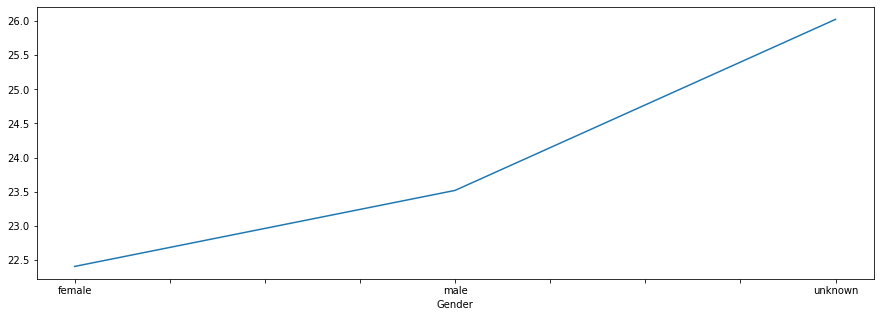

In [325]:
ny.groupby('Gender')['number_of_reviews'].mean().plot(figsize=(15,5))


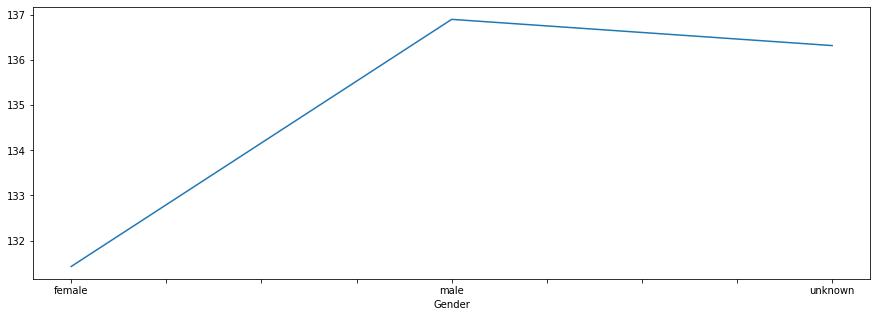

In [326]:
ny.groupby('Gender')['price'].mean().plot(figsize=(15,5))


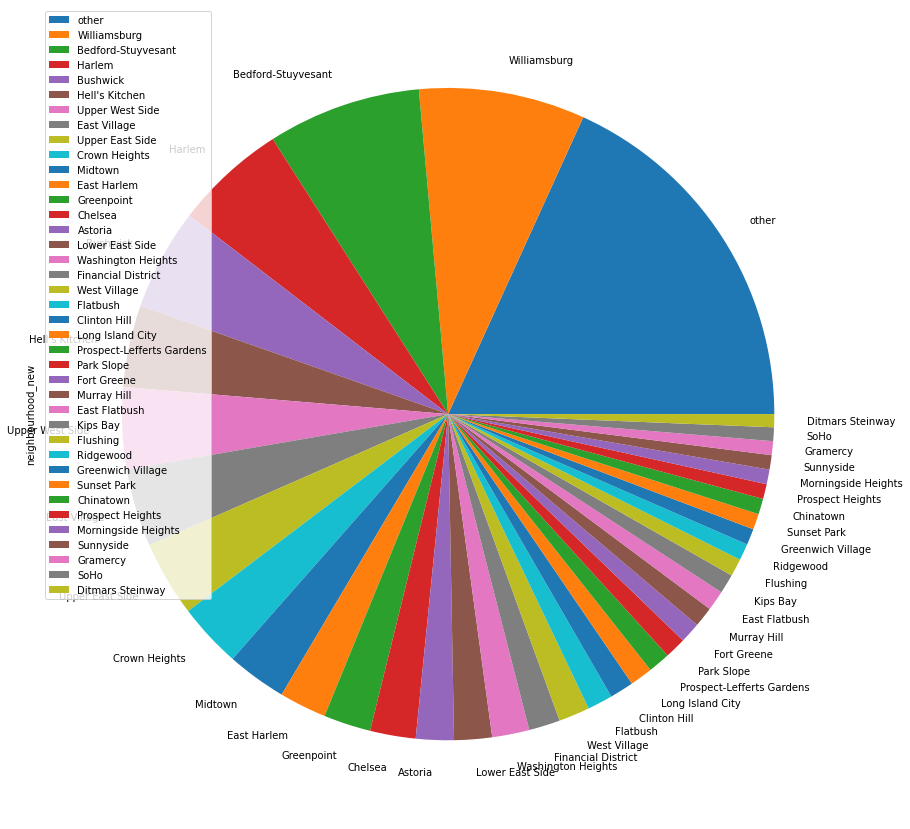

In [327]:
plt.figure(figsize=(15,15))
ny.neighbourhood_new.value_counts().plot.pie()
plt.legend()
plt.show()

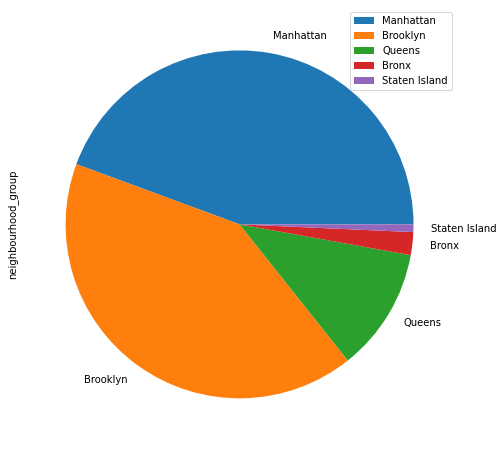

In [328]:
plt.figure(figsize=(15, 8))
ny.neighbourhood_group.value_counts().plot.pie()
plt.legend()
plt.show()

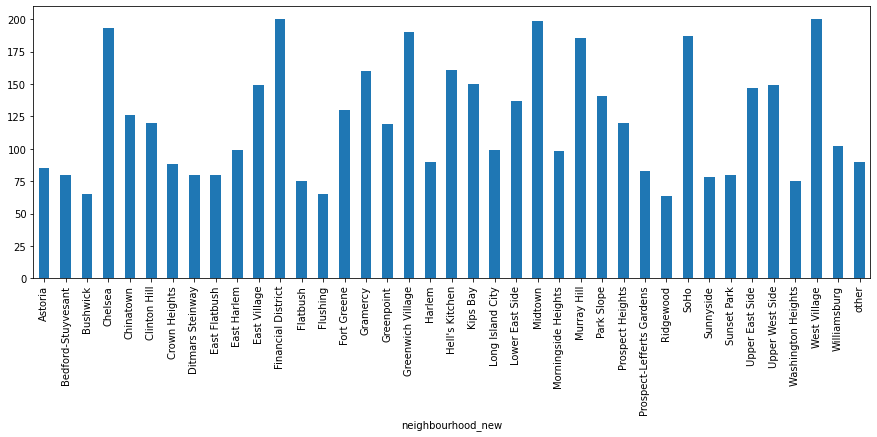

In [329]:
ny.groupby('neighbourhood_new')['price'].median().plot(figsize=(15,5), kind = 'bar')

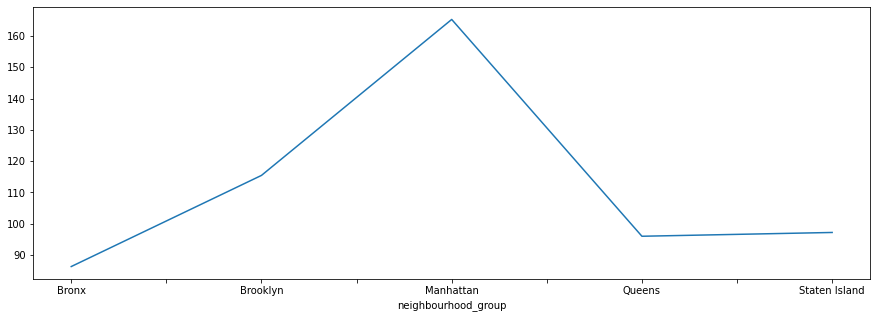

In [330]:
ny.groupby('neighbourhood_group')['price'].mean().plot(figsize=(15,5))

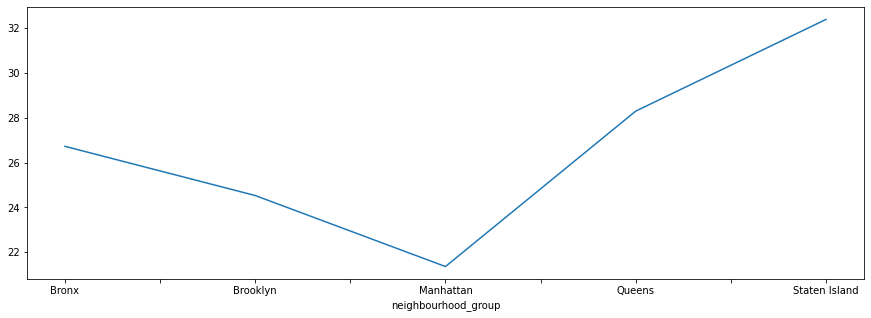

In [331]:
ny.groupby('neighbourhood_group')['number_of_reviews'].mean().plot(figsize=(15,5))

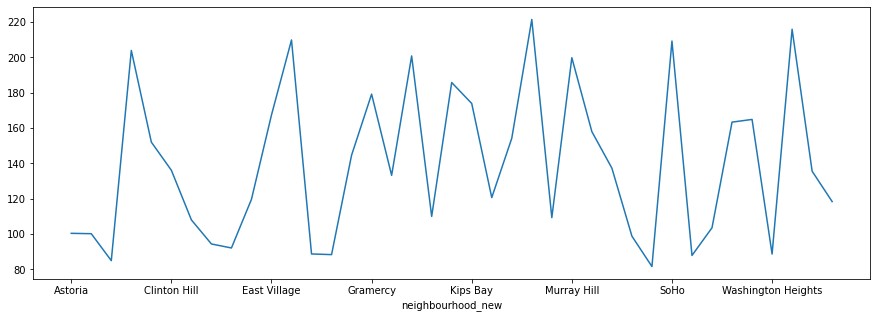

In [332]:
ny.groupby('neighbourhood_new')['price'].mean().plot(figsize=(15,5))

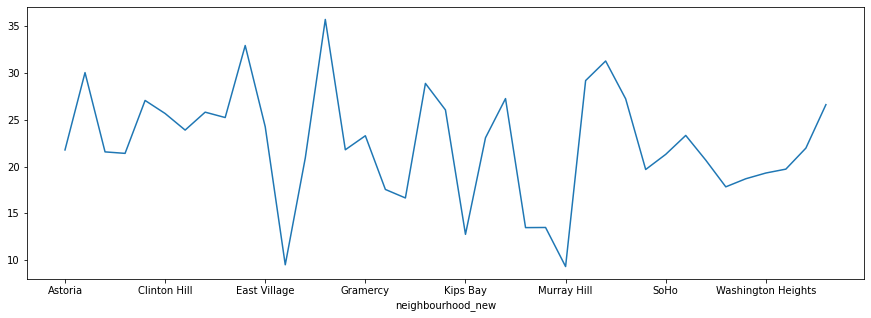

In [333]:
ny.groupby('neighbourhood_new')['number_of_reviews'].mean().plot(figsize=(15,5))

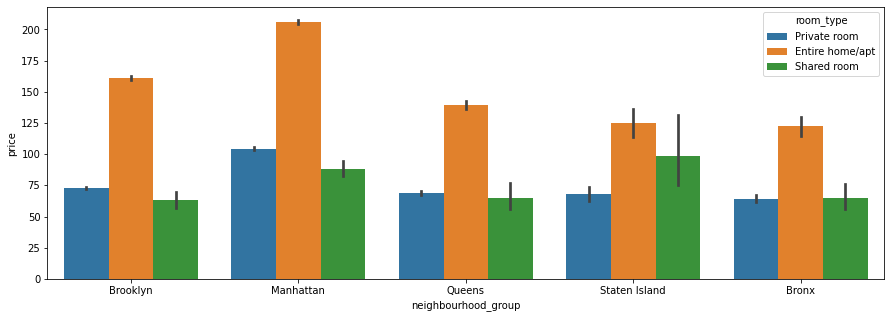

In [334]:
nygroup = ny[['neighbourhood_group', 'room_type', 'price']]
nygroup.groupby(['neighbourhood_group','room_type'])[['price']].mean()
plt.figure(figsize=(15, 5))

nygroup = sns.barplot(x="neighbourhood_group", y="price", data=nygroup, hue='room_type')
plt.show()

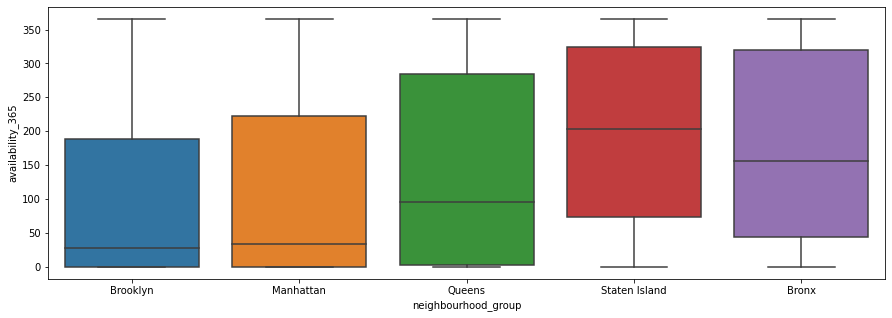

In [335]:
plt.figure(figsize=(15,5))
availability = sns.boxplot(data=ny, x='neighbourhood_group', y='availability_365')
plt.show()

<function matplotlib.pyplot.show>

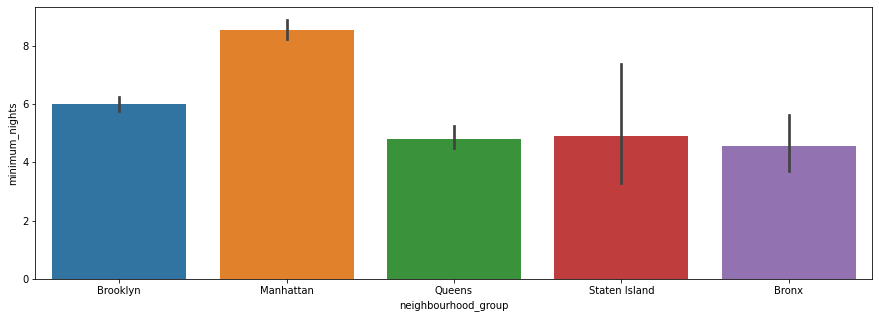

In [336]:
plt.figure(figsize=(15, 5))
minnights = sns.barplot(x='neighbourhood_group', y='minimum_nights',data=ny)
plt.show

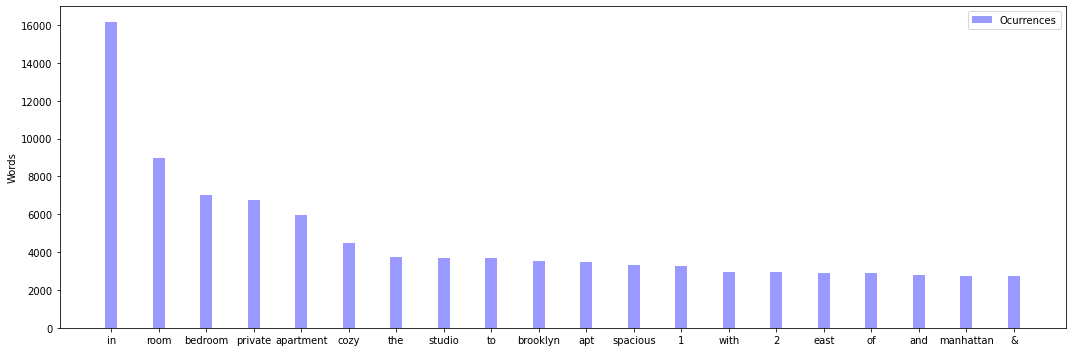

In [337]:
from collections import Counter
mostf = Counter(" ".join(ny["name"].str.lower()).split()).most_common(20)
plt.figure(figsize=(15, 5))
n_groups = len(mostf)
vals_films = [x[1] for x in mostf]
legends_films = [x[0] for x in mostf]
opacity = 0.4
bar_width = 0.25
index = np.arange(n_groups)
rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')
plt.ylabel('Words')
plt.xticks(index , legends_films)
plt.legend()

plt.tight_layout()
plt.show()


In [338]:
import statistics

host_mean = ny.host_id.value_counts().mean()
host_median = ny.host_id.value_counts().median()
host_counts = ny.host_id.value_counts()
host_mode = statistics.mode(host_counts)
host_quartiles = ny.host_id.value_counts().quantile([0.25,0.75])
print('the average number of ads per person is ' + str(host_mean) + '\nThe median of the distribution is ' + str(host_median) + 
      '\nThe mode for the distribution is ' + str(host_mode) + '\nand the quartiles are: \n' + str(host_quartiles))

the average number of ads per person is 1.2931233827010957
The median of the distribution is 1.0
The mode for the distribution is 1
and the quartiles are: 
0.25    1.0
0.75    1.0
Name: host_id, dtype: float64


In [339]:
ny.groupby('host_id').count().sort_values(by='name',ascending=False)

,name,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_new,Gender,combined
host_id,,,,,,,,,,,,,,
219517861,317,317,317,317,317,317,317,317,317,317,317,317,317,317
107434423,232,232,232,232,232,232,232,232,232,232,232,232,232,232
30283594,116,116,116,116,116,116,116,116,116,116,116,116,116,116
12243051,96,96,96,96,96,96,96,96,96,96,96,96,96,96
16098958,96,96,96,96,96,96,96,96,96,96,96,96,96,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313020,1,1,1,1,1,1,1,1,1,1,1,1,1,1
13312279,1,1,1,1,1,1,1,1,1,1,1,1,1,1
13307646,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [340]:
from scipy.stats import shapiro

m_price = ny[ny['Gender']=='male']['price']
f_price = ny[ny['Gender']=='female']['price']
stat, p = shapiro(m_price)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.854, p=0.000
Probably not Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [341]:
from scipy.stats import normaltest

stat, p = normaltest(f_price)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=6180.400, p=0.000
Probably not Gaussian


In [342]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(m_price, f_price)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=157673553.000, p=0.000
Different distribution (reject H0)


In [343]:
from scipy.stats import kruskal
u_price = ny[ny['Gender']=='unknown']['price']
stat, p = kruskal(m_price, f_price, u_price)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=22.926, p=0.000
Different distributions (reject H0)


In [344]:
m_price = (m_price - m_price.mean())/m_price.std()
f_price = (f_price - f_price.mean())/f_price.std()

In [345]:
stat, p = ttest_ind(m_price, f_price)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=0.000, p=1.000
Same distributions (fail to reject H0)


In [346]:
m_reviews = ny[ny['Gender']=='male']['number_of_reviews']
f_reviews = ny[ny['Gender']=='female']['number_of_reviews']

from scipy.stats import normaltest
stat, p = normaltest(m_reviews)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=12829.126, p=0.000
Probably not Gaussian


In [347]:
m_reviews = (m_reviews - m_reviews.mean())/m_reviews.std()
f_reviews = (f_reviews - f_reviews.mean())/f_reviews.std()

In [348]:
stat, p = ttest_ind(m_reviews, f_reviews)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=-0.000, p=1.000
Same distributions (fail to reject H0)


In [349]:
from scipy.stats import f_oneway

u_price = ny[ny['Gender']=='unknown']['price']
u_price = (u_price - u_price.mean())/u_price.std()
stat, p = f_oneway(m_price, f_price,u_price )
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=0.000, p=1.000
Same distributions (fail to reject H0)


###modeling Data

In [350]:
ny.head()

,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_new,Gender,combined
0,Clean & quiet apt home by the park,2787,John,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365,other,male,John-73.9723740.64749
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,Midtown,female,Jennifer-73.9837740.75362
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365,Harlem,female,Elisabeth-73.941940.80902
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,Clinton Hill,unknown,LisaRoxanne-73.9597640.68514
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,East Harlem,female,Laura-73.9439940.79851


In [351]:
newny = ny.copy()
newny.drop(['name','host_id','host_name','Gender','combined'], axis=1,inplace= True)
newny

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_new
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365,other
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,Midtown
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365,Harlem
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,Clinton Hill
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,East Harlem
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70,2,0,2,9,Bedford-Stuyvesant
48891,Brooklyn,40.70184,-73.93317,Private room,40,4,0,2,36,Bushwick
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,1,27,Harlem
48893,Manhattan,40.75751,-73.99112,Shared room,55,1,0,6,2,Hell's Kitchen


In [352]:
newny['neighbourhood_group'] = newny['neighbourhood_group'].factorize()[0]
newny['room_type'] = newny['room_type'].factorize()[0]
newny['neighbourhood_new'] = newny['neighbourhood_new'].factorize()[0]

newny.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_new
0,0,40.64749,-73.97237,0,149,1,9,6,365,0
1,1,40.75362,-73.98377,1,225,1,45,2,355,1
2,1,40.80902,-73.94190,0,150,3,0,1,365,2
3,0,40.68514,-73.95976,1,89,1,270,1,194,3
4,1,40.79851,-73.94399,1,80,10,9,1,0,4


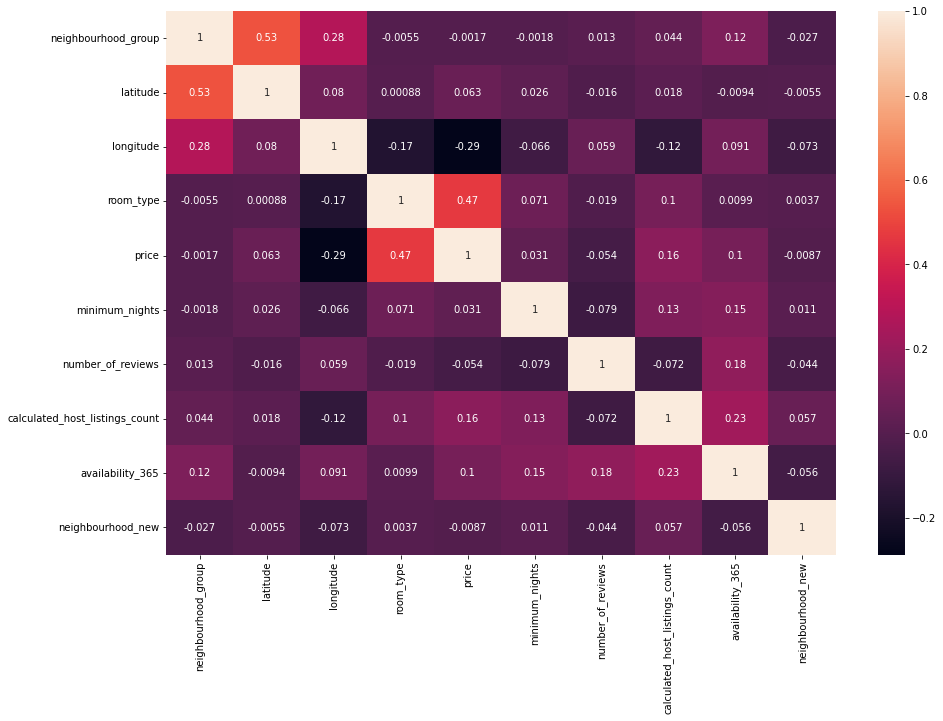

In [353]:
corr = newny.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [354]:
newny = (newny - newny.mean()) / newny.std()
X = newny.drop(['price'],axis=1)
y = newny['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

reg_score = reg.score(X_test, y_test)
print(reg_score)

0.30784829201993913


In [355]:
nycopy = newny.copy()
nycopy.drop(['latitude','longitude'], axis=1,inplace= True)
X = nycopy.drop(['price'],axis=1)
y = nycopy['price']

0.2524527999231593


<Figure size 432x288 with 0 Axes>

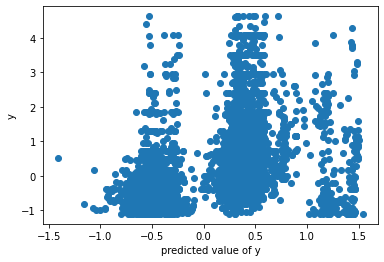

<Figure size 432x288 with 0 Axes>

In [356]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

reg_score = reg.score(X_test, y_test)
print(reg_score)
y_pred = reg.predict(X_test)
plt.scatter(y_pred,y_test)
plt.xlabel('predicted value of y')
plt.ylabel('y')
plt.figure()

as we can see deleting longitude and latitude affect on our score

In [357]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train)

reg_score = reg.score(X_test, y_test)
print(reg_score)

0.2524526932723852


In [358]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_test, y_test)

reg_score = reg.score(X_test, y_test)
print(reg_score)

0.22557853498049996


In [359]:
nycopy.drop(['calculated_host_listings_count','availability_365'], axis=1,inplace= True)
X = nycopy.drop(['price'],axis=1)
y = nycopy['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [360]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

reg_score = reg.score(X_test, y_test)
print(reg_score)

0.23249058253228105


our test score lowered so probably either calculated_host_listings_count or availability_365 have some affect on our score

In [361]:
nycopy = newny.copy()

In [362]:
nycopy.drop(['calculated_host_listings_count'], axis=1,inplace= True)
X = nycopy.drop(['price'],axis=1)
y = nycopy['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

reg_score = reg.score(X_test, y_test)
print(reg_score)

0.3035614913707867


In [363]:
nycopy = newny.copy()
nycopy.drop(['availability_365'], axis=1,inplace= True)
X = nycopy.drop(['price'],axis=1)
y = nycopy['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

reg_score = reg.score(X_test, y_test)
print(reg_score)

0.29733862450761606


based on this results both availability_365 and calculated_host_listings_count have some effect on our score

In [364]:
nycopy = newny.copy()
nycopy.drop(['minimum_nights','number_of_reviews'], axis=1,inplace= True)
X = nycopy.drop(['price'],axis=1)
y = nycopy['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

reg_score = reg.score(X_test, y_test)
print(reg_score)

0.30417595157979593


minimum_nights and number_of_reviews have some effect on our results as well

In [365]:
nycopy = newny.copy()
nycopy.drop(['room_type'], axis=1,inplace= True)
X = nycopy.drop(['price'],axis=1)
y = nycopy['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

reg_score = reg.score(X_test, y_test)
print(reg_score)

0.12379901530949733


as it was expected from the correlation matrix room_type is a very important feauture for predicting the price

In [366]:
nycopy = newny.copy()
nycopy.drop(['number_of_reviews','neighbourhood_new'], axis=1,inplace= True)
X = nycopy.drop(['price'],axis=1)
y = nycopy['price']
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

reg_score = reg.score(X_test, y_test)
print(reg_score)

0.3053305949974484


and number_of_reviews is probably the least important feature in predicting price

In [367]:
X = newny.drop(['price'],axis=1)
y = newny['price']
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,y_train)

DTree_score = DTree.score(X_test, y_test)
print(DTree_score)

0.2903205261902312


0.4773877666883086


<Figure size 432x288 with 0 Axes>

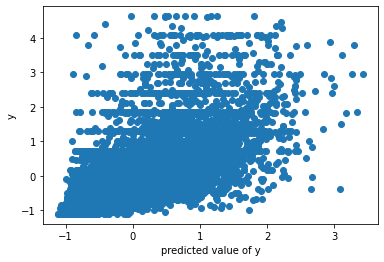

<Figure size 432x288 with 0 Axes>

In [368]:
from sklearn.ensemble import RandomForestRegressor
rndforest = RandomForestRegressor()
rndforest.fit(X_train, y_train)

randomf = rndforest.score(X_test, y_test)
print(randomf)
y_pred = rndforest.predict(X_test)
plt.scatter(y_pred,y_test)
plt.xlabel('predicted value of y')
plt.ylabel('y')
plt.figure()

and above we can observe two other methodes for predicting the price with better outcomes than linear regression